In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [107]:
td_original = pd.read_csv('data/train.csv')

In [108]:
# td_original.head()

In [109]:
# td_original.describe()

In [110]:
# td_original.info()

In [111]:
td_start = td_original.select_dtypes(exclude=['object'])

In [112]:
td_start.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [113]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

td, my_test_data = train_test_split(td_start, test_size=0.2, random_state=0)
print(td.shape)
print(my_test_data.shape)

(1168, 38)
(292, 38)


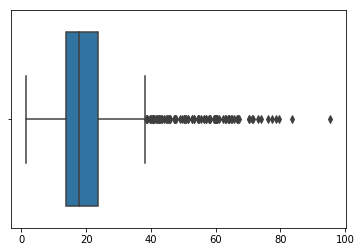

In [114]:
price_per_area = td['SalePrice'] / td['LotArea']
sns.boxplot(price_per_area);

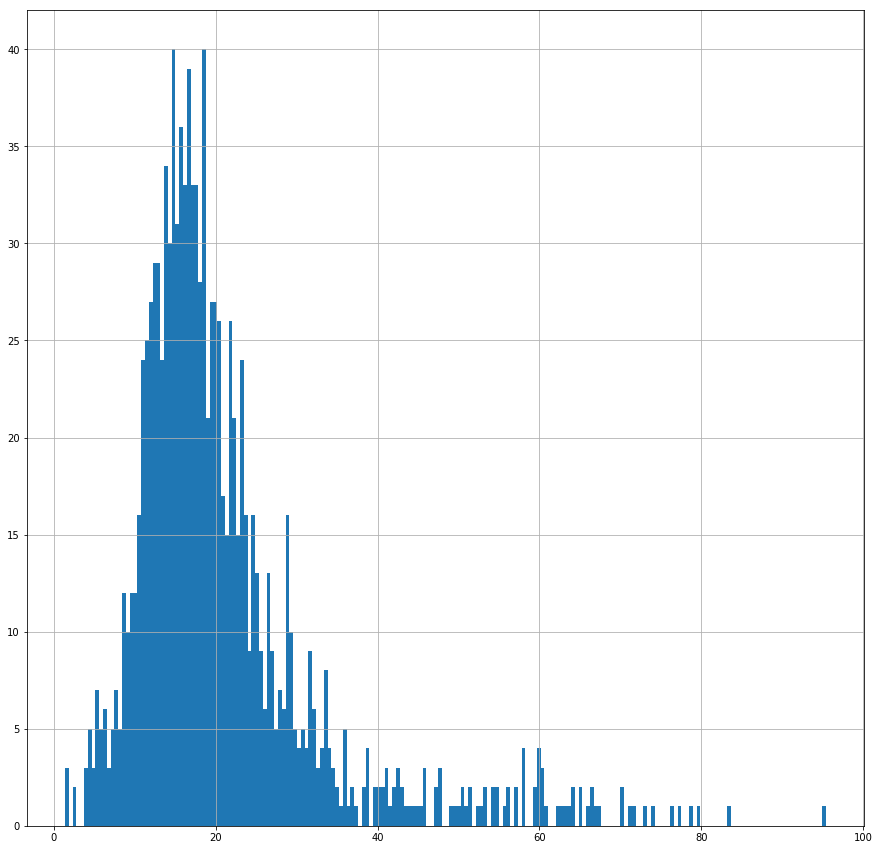

In [115]:
price_per_area.hist(figsize=(15, 15), bins=200);

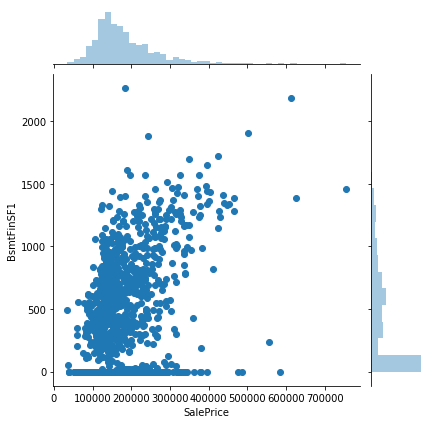

In [116]:
sns.jointplot(x='SalePrice', y='BsmtFinSF1', data=td, kind='scatter');

(1168, 38)
(1168, 38)


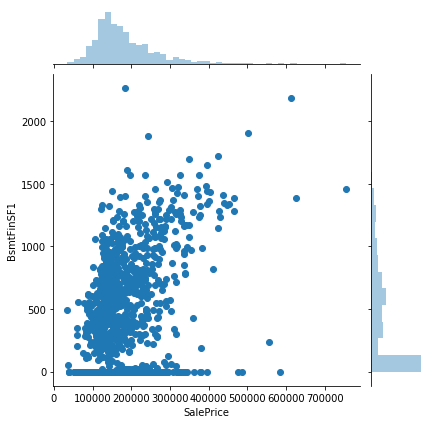

In [117]:
wtd = td.copy()
print(wtd.shape)
td1 = wtd.drop( wtd[wtd['BsmtFinSF1'] > 2300].index )
print(td1.shape)
sns.jointplot(x='SalePrice', y='BsmtFinSF1', data=td1, kind='scatter');

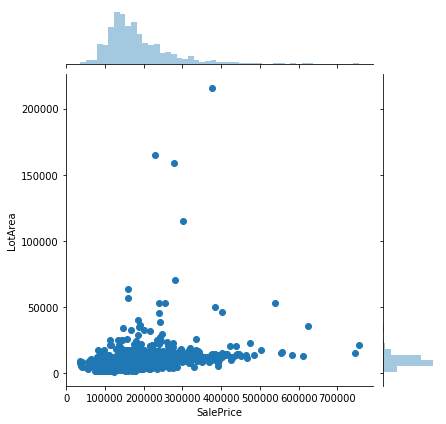

In [76]:
sns.jointplot(x='SalePrice', y='LotArea', data=td_original, kind='scatter');

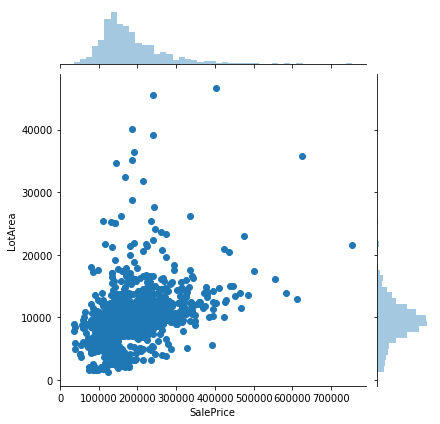

In [118]:
wtd = td1.copy()

td2 = wtd.drop( wtd[wtd['LotArea'] > 50000].index )
sns.jointplot(x='SalePrice', y='LotArea', data=td2, kind='scatter');

(1160, 38)
(11, 38)


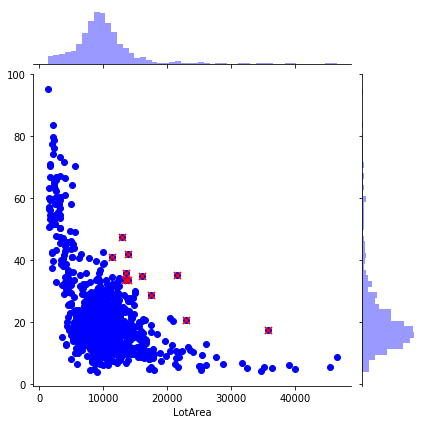

In [119]:
wtd = td2.copy()
print(wtd.shape)

price_per_area = wtd['SalePrice'] / wtd['LotArea']
graph = sns.jointplot(x=wtd['LotArea'], y=price_per_area, color='blue')

drop_threshold = 450000
td_test = wtd.drop( wtd[wtd['SalePrice'] < drop_threshold].index )
print(td_test.shape)

price_per_area = td_test['SalePrice'] / td_test['LotArea']
graph.x = td_test['LotArea']
graph.y = price_per_area
graph.plot_joint(plt.scatter, marker='x', c='r', s=50)

In [120]:
keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'BedroomAbvGr',
               'LotFrontage', 'YearRemodAdd', 'ScreenPorch', 'BsmtHalfBath', 'MSSubClass', 
               'BsmtFinSF2', 'BsmtFullBath']

keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'LotFrontage',
               'YearRemodAdd', 'ScreenPorch', 'BsmtFinSF2', 'BsmtFullBath']

# keys_to_fit = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#                'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#                'MiscVal', 'MoSold', 'YrSold']

# td2[keys_to_fit].hist(figsize=(10, 10), bins=200);

In [121]:
wtd = td2.copy()
td3 = wtd.drop( wtd[wtd['SalePrice'] > drop_threshold].index )
print(td3.shape)

wtd = td3
train_X = wtd[keys_to_fit]
train_y = wtd['SalePrice']

(1149, 38)


In [122]:
%%time
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

my_pipeline = make_pipeline(SimpleImputer(), XGBRegressor())
my_pipeline.fit(train_X, train_y);

Wall time: 128 ms


In [123]:
from sklearn.model_selection import cross_val_score

wtd = td3
X_val = wtd[keys_to_fit]
val_y = wtd['SalePrice']

scores = cross_val_score(my_pipeline, X_val, val_y, scoring='neg_mean_absolute_error', cv=5)
# print(scores * -1)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 15960.319494


In [98]:
keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'LotFrontage',
               'YearRemodAdd', 'ScreenPorch', 'BsmtFinSF2', 'BsmtFullBath']
wtd = td3
X_val = wtd[keys_to_fit]
val_y = wtd['SalePrice']

xgb = XGBRegressor()
xgb.fit(X_val, val_y)
xgb.feature_importances_

array([0.08774584, 0.22239032, 0.07564297, 0.11951589, 0.11043873,
       0.07564297, 0.02420575, 0.10590015, 0.01512859, 0.05900151,
       0.03933434, 0.01210287, 0.03782148, 0.01512859], dtype=float32)

In [124]:
from sklearn.metrics import mean_absolute_error

my_test_X = my_test_data[keys_to_fit]
my_test_preds = my_pipeline.predict(my_test_X)
my_test_val_y = my_test_data['SalePrice']

mae = mean_absolute_error(my_test_val_y, my_test_preds)
print(mae)
print('done')

18724.729064105308
done


In [84]:
test_data_path = 'data/test.csv'
test_data = pd.read_csv(test_data_path)
print(test_data.shape)

(1459, 80)


In [85]:
test_X = test_data[keys_to_fit]
test_preds = my_pipeline.predict(test_X)

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
# print(output)
print(test_preds.size)
output.to_csv('output/submission.csv', index=False)
print('done')

1459
done
